# General

In [60]:
import time

# Start the timer at the beginning of your notebook
start_time = time.time()

In [61]:
import pandas as pd
import numpy as np

import requests
import math
from datetime import datetime, timedelta

import seaborn as sns
import matplotlib.pyplot as plt

# Encode categorical variables (example for wind_direction)
from sklearn.preprocessing import LabelEncoder

In [62]:
from datetime import datetime
import pytz

# Define your local timezone
local_tz = pytz.timezone('Asia/Kolkata')  # Replace with your timezone

# Get current UTC time
current_utc_time = datetime.utcnow().replace(tzinfo=pytz.utc)

# Convert UTC to local time
current_local_time = current_utc_time.astimezone(local_tz)

print("Current Local Time:", current_local_time)


Current Local Time: 2025-06-18 16:33:32.134852+05:30


C:\Users\Administrator\AppData\Local\Temp\ipykernel_12496\3586415837.py:8: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  current_utc_time = datetime.utcnow().replace(tzinfo=pytz.utc)


In [63]:
import math
from datetime import datetime, timedelta
import requests
import pandas as pd
import pytz

# Define your local timezone
local_tz = pytz.timezone('Asia/Kolkata')  # Replace with your timezone

# API Key
API_KEY = "6fbf86cc0b0640b4a6983900253105"

def calculate_vpd(temp_c, relative_humidity):
    svp = 0.6108 * math.exp((17.27 * temp_c) / (temp_c + 237.3))  # Saturated vapor pressure
    avp = (relative_humidity / 100) * svp  # Actual vapor pressure
    vpd = svp - avp  # Vapor pressure deficit
    return round(vpd, 3)  # kPa rounded to 3 decimals

def fetch_weather_data(lat, lon):
    data_training = []
    # Get current local time
    current_local_time = datetime.now(local_tz)
    print("Current Local Time:", current_local_time)

    # Fetch hourly data for the past 7 days, including today
    for day_delta in range(7):
        date = current_local_time.date() - timedelta(days=day_delta)
        date_str = date.strftime("%Y-%m-%d")

        # Fetch hourly data for the specific date
        url = f"http://api.weatherapi.com/v1/history.json?key={API_KEY}&q={lat},{lon}&dt={date_str}"
        response = requests.get(url)

        if response.status_code != 200:
            print(f"Error fetching data for {date_str}: {response.status_code}")
            continue

        weather_json = response.json()
        forecast_day = weather_json.get("forecast", {}).get("forecastday", [])
        if not forecast_day:
            print(f"No forecast data available for {date_str}.")
            continue

        hours = forecast_day[0].get("hour", [])
        for hour in hours:
            temp_c = hour.get("temp_c")
            rh = hour.get("humidity")

            # Skip if temperature or humidity is missing
            if temp_c is None or rh is None:
                continue

            vpd = calculate_vpd(temp_c, rh)

            data_training.append({
                "datetime": hour["time"],
                "temperature_2m": temp_c,
                "dewpoint_2m": hour.get("dewpoint_c"),
                "apparent_temperature": hour.get("feelslike_c"),
                "wind_speed_10m": hour.get("wind_kph"),
                "wind_direction": hour.get("wind_dir"),
                "cloud_cover_avg": hour.get("cloud"),
                "surface_pressure": hour.get("pressure_mb"),
                "sealevel_pressure": hour.get("pressure_mb"),
                "rainfall": hour.get("precip_mm"),
                "snowfall": hour.get("snow", 0),
                "relative_humidity_2m": rh,
                "visibility": hour.get("vis_km"),
                "uv_index": hour.get("uv"),
                "chance_of_rain": hour.get("chance_of_rain", 0),
                "weather_condition": hour.get("condition", {}).get("text", "Unknown"),
                "vapour_pressure_deficit": vpd
            })

    # Convert to DataFrame
    df = pd.DataFrame(data_training)

    # Sort and filter the DataFrame
    df["datetime"] = pd.to_datetime(df["datetime"])  # Convert to datetime
    df = df.sort_values(by="datetime")  # Sort by datetime

    # Keep only rows that are before or equal to the current local time
    current_local_time_str = current_local_time.strftime('%Y-%m-%d %H:%M:%S')
    current_local_time_dt = pd.to_datetime(current_local_time_str)
    df = df[df["datetime"] <= current_local_time_dt]

    return df

# Example usage
df = fetch_weather_data(18.9582, 72.8321 )  # Mumbai coordinates
print(df)


Current Local Time: 2025-06-18 16:33:32.165216+05:30
               datetime  temperature_2m  dewpoint_2m  apparent_temperature  \
144 2025-06-12 00:00:00            29.1         25.7                  35.3   
145 2025-06-12 01:00:00            29.1         25.6                  35.2   
146 2025-06-12 02:00:00            29.0         25.5                  35.0   
147 2025-06-12 03:00:00            29.0         25.4                  34.9   
148 2025-06-12 04:00:00            29.0         25.4                  34.9   
..                  ...             ...          ...                   ...   
12  2025-06-18 12:00:00            29.6         24.9                  35.3   
13  2025-06-18 13:00:00            29.7         24.9                  35.4   
14  2025-06-18 14:00:00            29.6         24.9                  35.3   
15  2025-06-18 15:00:00            29.3         24.9                  34.9   
16  2025-06-18 16:00:00            29.2         24.9                  34.7   

     wind_

In [64]:
from datetime import datetime

# Get the current local time
current_time_local = datetime.now()
print("Current Local Time:", current_time_local)

# Get the current UTC time
current_time_utc = datetime.utcnow()
print("Current UTC Time:", current_time_utc)


Current Local Time: 2025-06-18 16:33:34.800403
Current UTC Time: 2025-06-18 11:03:34.800403


C:\Users\Administrator\AppData\Local\Temp\ipykernel_12496\879466599.py:8: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  current_time_utc = datetime.utcnow()


In [65]:
data = fetch_weather_data(18.9582, 72.8777)

Current Local Time: 2025-06-18 16:33:34.818970+05:30


In [66]:
data

,datetime,temperature_2m,dewpoint_2m,apparent_temperature,wind_speed_10m,wind_direction,cloud_cover_avg,surface_pressure,sealevel_pressure,rainfall,snowfall,relative_humidity_2m,visibility,uv_index,chance_of_rain,weather_condition,vapour_pressure_deficit
144,2025-06-12 00:00:00,29.1,25.7,35.3,21.6,W,62,1004.0,1004.0,0.06,0,82,10.0,0.0,45,Patchy rain possible,0.725
145,2025-06-12 01:00:00,29.1,25.6,35.2,20.2,W,70,1004.0,1004.0,0.16,0,82,10.0,0.0,100,Light rain shower,0.725
146,2025-06-12 02:00:00,29.0,25.5,35.0,22.0,W,86,1004.0,1004.0,0.07,0,81,10.0,0.0,45,Patchy rain possible,0.761
147,2025-06-12 03:00:00,29.0,25.4,34.9,23.0,WNW,84,1004.0,1004.0,0.09,0,81,10.0,0.0,100,Patchy rain possible,0.761
148,2025-06-12 04:00:00,29.0,25.4,34.9,20.9,WNW,76,1004.0,1004.0,0.11,0,81,10.0,0.0,100,Patchy rain possible,0.761
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12,2025-06-18 12:00:00,29.6,24.9,35.3,32.0,SW,72,1004.0,1004.0,0.62,0,76,9.0,6.0,100,Patchy rain possible,0.995
13,2025-06-18 13:00:00,29.7,24.9,35.4,31.7,SW,88,1004.0,1004.0,0.25,0,76,9.0,6.0,100,Patchy rain possible,1.001
14,2025-06-18 14:00:00,29.6,24.9,35.3,32.0,SW,86,1003.0,1003.0,0.59,0,76,9.0,6.0,100,Patchy rain possible,0.995
15,2025-06-18 15:00:00,29.3,24.9,34.9,32.4,SW,77,1003.0,1003.0,0.27,0,77,9.0,6.0,100,Patchy rain possible,0.937


In [67]:
df = pd.DataFrame(data)
df

,datetime,temperature_2m,dewpoint_2m,apparent_temperature,wind_speed_10m,wind_direction,cloud_cover_avg,surface_pressure,sealevel_pressure,rainfall,snowfall,relative_humidity_2m,visibility,uv_index,chance_of_rain,weather_condition,vapour_pressure_deficit
144,2025-06-12 00:00:00,29.1,25.7,35.3,21.6,W,62,1004.0,1004.0,0.06,0,82,10.0,0.0,45,Patchy rain possible,0.725
145,2025-06-12 01:00:00,29.1,25.6,35.2,20.2,W,70,1004.0,1004.0,0.16,0,82,10.0,0.0,100,Light rain shower,0.725
146,2025-06-12 02:00:00,29.0,25.5,35.0,22.0,W,86,1004.0,1004.0,0.07,0,81,10.0,0.0,45,Patchy rain possible,0.761
147,2025-06-12 03:00:00,29.0,25.4,34.9,23.0,WNW,84,1004.0,1004.0,0.09,0,81,10.0,0.0,100,Patchy rain possible,0.761
148,2025-06-12 04:00:00,29.0,25.4,34.9,20.9,WNW,76,1004.0,1004.0,0.11,0,81,10.0,0.0,100,Patchy rain possible,0.761
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12,2025-06-18 12:00:00,29.6,24.9,35.3,32.0,SW,72,1004.0,1004.0,0.62,0,76,9.0,6.0,100,Patchy rain possible,0.995
13,2025-06-18 13:00:00,29.7,24.9,35.4,31.7,SW,88,1004.0,1004.0,0.25,0,76,9.0,6.0,100,Patchy rain possible,1.001
14,2025-06-18 14:00:00,29.6,24.9,35.3,32.0,SW,86,1003.0,1003.0,0.59,0,76,9.0,6.0,100,Patchy rain possible,0.995
15,2025-06-18 15:00:00,29.3,24.9,34.9,32.4,SW,77,1003.0,1003.0,0.27,0,77,9.0,6.0,100,Patchy rain possible,0.937


In [68]:
import pandas as pd
from datetime import timedelta

def add_future_features_df(df):
    # Make sure datetime column is datetime type
    df['datetime'] = pd.to_datetime(df['datetime'])

    # Sort by datetime
    df = df.sort_values('datetime').reset_index(drop=True)

    # For each hour from 1 to 5, create new columns with shifted values
    for h in range(1, 6):
        df[f'temperature_2m_{h}h'] = df['temperature_2m'].shift(-h)
        #df[f'rainfall_{h}h'] = df['rainfall'].shift(-h)
        df[f'relative_humidity_2m_{h}h'] = df['relative_humidity_2m'].shift(-h)
        df[f'chance_of_rain_{h}h'] = df['chance_of_rain'].shift(-h)

    return df
df2 = add_future_features_df(df)
df2.tail(50)

,datetime,temperature_2m,dewpoint_2m,apparent_temperature,wind_speed_10m,wind_direction,cloud_cover_avg,surface_pressure,sealevel_pressure,rainfall,...,chance_of_rain_2h,temperature_2m_3h,relative_humidity_2m_3h,chance_of_rain_3h,temperature_2m_4h,relative_humidity_2m_4h,chance_of_rain_4h,temperature_2m_5h,relative_humidity_2m_5h,chance_of_rain_5h
111,2025-06-16 15:00:00,27.4,23.2,30.8,23.4,WSW,78,1002.0,1002.0,0.31,...,100.0,27.8,76.0,100.0,27.4,78.0,100.0,27.4,78.0,100.0
112,2025-06-16 16:00:00,27.8,23.0,31.2,16.2,WSW,68,1002.0,1002.0,0.06,...,100.0,27.4,78.0,100.0,27.4,78.0,100.0,27.7,78.0,100.0
113,2025-06-16 17:00:00,28.0,22.8,31.3,13.3,SW,66,1002.0,1002.0,0.11,...,100.0,27.4,78.0,100.0,27.7,78.0,100.0,27.8,78.0,100.0
114,2025-06-16 18:00:00,27.8,23.1,31.2,13.7,SSW,71,1002.0,1002.0,0.31,...,100.0,27.7,78.0,100.0,27.8,78.0,100.0,27.8,78.0,100.0
115,2025-06-16 19:00:00,27.4,23.3,30.9,15.8,S,64,1003.0,1003.0,0.18,...,100.0,27.8,78.0,100.0,27.8,78.0,100.0,27.4,81.0,100.0
116,2025-06-16 20:00:00,27.4,23.3,30.9,16.2,SSW,53,1003.0,1003.0,0.20,...,100.0,27.8,78.0,100.0,27.4,81.0,100.0,27.4,82.0,100.0
117,2025-06-16 21:00:00,27.7,23.5,31.3,20.2,SSW,89,1003.0,1003.0,0.16,...,100.0,27.4,81.0,100.0,27.4,82.0,100.0,27.6,81.0,100.0
118,2025-06-16 22:00:00,27.8,23.6,31.6,19.8,SSW,51,1004.0,1004.0,0.47,...,100.0,27.4,82.0,100.0,27.6,81.0,100.0,27.6,81.0,100.0
119,2025-06-16 23:00:00,27.8,23.6,31.5,21.2,SSW,100,1005.0,1005.0,0.60,...,100.0,27.6,81.0,100.0,27.6,81.0,100.0,27.7,81.0,100.0
120,2025-06-17 00:00:00,27.4,24.0,31.3,23.0,SSW,62,1003.0,1003.0,1.03,...,100.0,27.6,81.0,100.0,27.7,81.0,100.0,28.0,80.0,100.0


In [69]:
main_prediction_row_current_feature = df2.iloc[-1]
print(main_prediction_row_current_feature)

datetime                    2025-06-18 16:00:00
temperature_2m                             29.2
dewpoint_2m                                24.9
apparent_temperature                       34.7
wind_speed_10m                             31.7
wind_direction                               SW
cloud_cover_avg                              51
surface_pressure                         1003.0
sealevel_pressure                        1003.0
rainfall                                   0.11
snowfall                                      0
relative_humidity_2m                         77
visibility                                 10.0
uv_index                                    6.0
chance_of_rain                              100
weather_condition          Patchy rain possible
vapour_pressure_deficit                   0.932
temperature_2m_1h                           NaN
relative_humidity_2m_1h                     NaN
chance_of_rain_1h                           NaN
temperature_2m_2h                       

In [70]:
df3 = df2.copy()  # Make a copy to avoid SettingWithCopyWarning

df3['hour'] = df3['datetime'].dt.hour
df3['hour_sin'] = np.sin(2 * np.pi * df3['hour'] / 24)
df3['hour_cos'] = np.cos(2 * np.pi * df3['hour'] / 24)
df = df3

In [71]:
import numpy as np

# Define a mapping of wind direction to degrees
wind_direction_to_degrees = {
    'N': 0, 'NNE': 22.5, 'NE': 45, 'ENE': 67.5, 'E': 90,
    'ESE': 112.5, 'SE': 135, 'SSE': 157.5, 'S': 180,
    'SSW': 202.5, 'SW': 225, 'WSW': 247.5, 'W': 270,
    'WNW': 292.5, 'NW': 315, 'NNW': 337.5
}

# Map the wind directions to degrees
df['wind_degrees'] = df['wind_direction'].map(wind_direction_to_degrees)

# Convert degrees into two components (wind_x and wind_y)
df['wind_x'] = np.cos(np.radians(df['wind_degrees']))
df['wind_y'] = np.sin(np.radians(df['wind_degrees']))

# Drop the original wind_direction column
df.drop(columns=['wind_direction'], inplace=True)



In [72]:
df['weather_condition'].unique()
# This is very useful in rain prediction

array(['Patchy rain possible', 'Light rain shower', 'Partly cloudy',
       'Clear', 'Patchy light rain with thunder', 'Overcast',
       'Thundery outbreaks possible', 'Moderate or heavy rain shower',
       'Torrential rain shower', 'Heavy rain', 'Light drizzle',
       'Light rain', 'Patchy light drizzle'], dtype=object)

In [73]:
#Weather condition

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False, drop='first')  # Drop first to avoid multicollinearity
encoded = encoder.fit_transform(df[['weather_condition']])
df_encoded = pd.DataFrame(encoded, columns=encoder.get_feature_names_out())
df = pd.concat([df, df_encoded], axis=1).drop(columns=['weather_condition'])


# Temperature

**Temperature**

In [74]:
df

,datetime,temperature_2m,dewpoint_2m,apparent_temperature,wind_speed_10m,cloud_cover_avg,surface_pressure,sealevel_pressure,rainfall,snowfall,...,weather_condition_Light rain,weather_condition_Light rain shower,weather_condition_Moderate or heavy rain shower,weather_condition_Overcast,weather_condition_Partly cloudy,weather_condition_Patchy light drizzle,weather_condition_Patchy light rain with thunder,weather_condition_Patchy rain possible,weather_condition_Thundery outbreaks possible,weather_condition_Torrential rain shower
0,2025-06-12 00:00:00,29.1,25.7,35.3,21.6,62,1004.0,1004.0,0.06,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2025-06-12 01:00:00,29.1,25.6,35.2,20.2,70,1004.0,1004.0,0.16,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2025-06-12 02:00:00,29.0,25.5,35.0,22.0,86,1004.0,1004.0,0.07,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,2025-06-12 03:00:00,29.0,25.4,34.9,23.0,84,1004.0,1004.0,0.09,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2025-06-12 04:00:00,29.0,25.4,34.9,20.9,76,1004.0,1004.0,0.11,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,2025-06-18 12:00:00,29.6,24.9,35.3,32.0,72,1004.0,1004.0,0.62,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
157,2025-06-18 13:00:00,29.7,24.9,35.4,31.7,88,1004.0,1004.0,0.25,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
158,2025-06-18 14:00:00,29.6,24.9,35.3,32.0,86,1003.0,1003.0,0.59,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
159,2025-06-18 15:00:00,29.3,24.9,34.9,32.4,77,1003.0,1003.0,0.27,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


datetime                                            datetime64[ns]
temperature_2m                                             float64
dewpoint_2m                                                float64
apparent_temperature                                       float64
wind_speed_10m                                             float64
cloud_cover_avg                                              int64
surface_pressure                                           float64
sealevel_pressure                                          float64
rainfall                                                   float64
snowfall                                                     int64
relative_humidity_2m                                         int64
visibility                                                 float64
uv_index                                                   float64
chance_of_rain                                               int64
vapour_pressure_deficit                                    flo

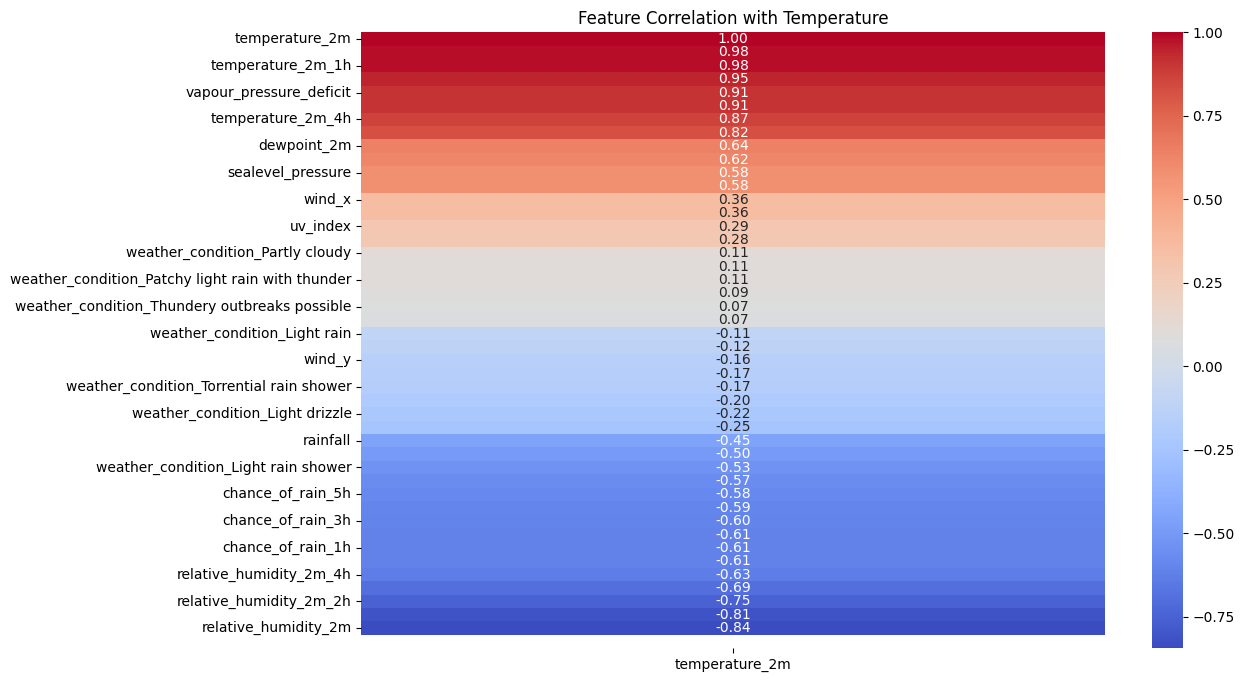

In [75]:


if 'wind_direction' in df.columns:
    label_encoder = LabelEncoder()
    df['wind_direction_encoded'] = label_encoder.fit_transform(df['wind_direction'])
    df = df.drop(columns=['wind_direction'])  # Drop original column if not needed

# Check if all columns are numeric
print(df.dtypes)

# Ensure all columns used in the correlation are numeric
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
corr_matrix = df[numeric_cols].corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    corr_matrix[['temperature_2m']].sort_values(by='temperature_2m', ascending=False),
    annot=True,
    cmap='coolwarm',
    fmt='.2f'
)
plt.title("Feature Correlation with Temperature")
plt.show()


In [76]:
corm = corr_matrix[['temperature_2m']].sort_values(by='temperature_2m', ascending=False)
corm

,temperature_2m
temperature_2m,1.000000
apparent_temperature,0.982750
temperature_2m_1h,0.981856
temperature_2m_2h,0.949015
vapour_pressure_deficit,0.912647
temperature_2m_3h,0.910010
temperature_2m_4h,0.867241
temperature_2m_5h,0.821478
dewpoint_2m,0.642021
weather_condition_Patchy rain possible,0.620392


In [77]:
# Filter columns with absolute correlation greater than 0.5
threshold = 0.25
correlated_features = corm[abs(corm['temperature_2m']) > threshold].index.tolist()

# Display the selected features


dft = df.drop(columns=[col for col in correlated_features if not col in df.columns])

In [78]:
dft.columns

Index(['datetime', 'temperature_2m', 'dewpoint_2m', 'apparent_temperature',
       'wind_speed_10m', 'cloud_cover_avg', 'surface_pressure',
       'sealevel_pressure', 'rainfall', 'snowfall', 'relative_humidity_2m',
       'visibility', 'uv_index', 'chance_of_rain', 'vapour_pressure_deficit',
       'temperature_2m_1h', 'relative_humidity_2m_1h', 'chance_of_rain_1h',
       'temperature_2m_2h', 'relative_humidity_2m_2h', 'chance_of_rain_2h',
       'temperature_2m_3h', 'relative_humidity_2m_3h', 'chance_of_rain_3h',
       'temperature_2m_4h', 'relative_humidity_2m_4h', 'chance_of_rain_4h',
       'temperature_2m_5h', 'relative_humidity_2m_5h', 'chance_of_rain_5h',
       'hour', 'hour_sin', 'hour_cos', 'wind_degrees', 'wind_x', 'wind_y',
       'weather_condition_Heavy rain', 'weather_condition_Light drizzle',
       'weather_condition_Light rain', 'weather_condition_Light rain shower',
       'weather_condition_Moderate or heavy rain shower',
       'weather_condition_Overcast', 'wea

In [79]:
# Columns to use as features (X)
feature_cols = [
    "temperature_2m",
    "dewpoint_2m",
    "visibility",
    "uv_index",
    "vapour_pressure_deficit",
    "chance_of_rain",
    "apparent_temperature",
    "rainfall",
    "weather_condition_Moderate or heavy rain shower",
    "weather_condition_Partly cloudy",
    "weather_condition_Patchy rain possible",
    "relative_humidity_2m",
    "wind_speed_10m",
    "cloud_cover_avg",
    "surface_pressure",
    "hour_sin",
    "hour_cos"
]


# Columns to use as targets (Y) - future temperature predictions
target_cols = [
    "temperature_2m_1h",
    "temperature_2m_2h",
    "temperature_2m_3h",
    "temperature_2m_4h",
    "temperature_2m_5h"
]

# Prepare X and Y from your DataFrame `df3`
X = dft[feature_cols]
Y = dft[target_cols]


In [80]:
dft

,datetime,temperature_2m,dewpoint_2m,apparent_temperature,wind_speed_10m,cloud_cover_avg,surface_pressure,sealevel_pressure,rainfall,snowfall,...,weather_condition_Light rain,weather_condition_Light rain shower,weather_condition_Moderate or heavy rain shower,weather_condition_Overcast,weather_condition_Partly cloudy,weather_condition_Patchy light drizzle,weather_condition_Patchy light rain with thunder,weather_condition_Patchy rain possible,weather_condition_Thundery outbreaks possible,weather_condition_Torrential rain shower
0,2025-06-12 00:00:00,29.1,25.7,35.3,21.6,62,1004.0,1004.0,0.06,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2025-06-12 01:00:00,29.1,25.6,35.2,20.2,70,1004.0,1004.0,0.16,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2025-06-12 02:00:00,29.0,25.5,35.0,22.0,86,1004.0,1004.0,0.07,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,2025-06-12 03:00:00,29.0,25.4,34.9,23.0,84,1004.0,1004.0,0.09,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2025-06-12 04:00:00,29.0,25.4,34.9,20.9,76,1004.0,1004.0,0.11,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,2025-06-18 12:00:00,29.6,24.9,35.3,32.0,72,1004.0,1004.0,0.62,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
157,2025-06-18 13:00:00,29.7,24.9,35.4,31.7,88,1004.0,1004.0,0.25,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
158,2025-06-18 14:00:00,29.6,24.9,35.3,32.0,86,1003.0,1003.0,0.59,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
159,2025-06-18 15:00:00,29.3,24.9,34.9,32.4,77,1003.0,1003.0,0.27,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [81]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor

def iterative_fill(df, target_cols, feature_cols):
    """
    df: pandas DataFrame containing original features and shifted target columns.
    target_cols: list of target columns to predict in order, e.g. ['temp_1h', 'temp_2h', ..., 'temp_5h']
    feature_cols: list of feature columns to use for training and prediction.

    Returns:
    df_filled: DataFrame with missing values in target_cols filled iteratively.
    """

    df_filled = df.copy()

    for i, target_col in enumerate(target_cols):
        print(f"\nPredicting and filling missing values for: {target_col}")

        # Select rows where target_col is NOT null for training
        train_df = df_filled[df_filled[target_col].notna()]

        # Select rows where target_col IS null for prediction
        predict_df = df_filled[df_filled[target_col].isna()]

        if predict_df.empty:
            print(f"No missing values to fill for {target_col}")
            continue

        # Features for training: all features + previously predicted target columns (up to current)
        current_features = feature_cols + target_cols[:i]

        # Drop rows with NaNs in features or target from training set
        train_df = train_df.dropna(subset=current_features + [target_col])

        if train_df.empty:
            print(f"No sufficient data to train model for {target_col}")
            continue

        X_train = train_df[current_features]
        y_train = train_df[target_col]

        # For prediction rows, features must also be available (drop rows with NaN in features)
        predict_df = predict_df.dropna(subset=current_features)

        if predict_df.empty:
            print(f"No rows with enough features to predict for {target_col}")
            continue

        X_predict = predict_df[current_features]

        # Train the model
        model = RandomForestRegressor(n_estimators=100, random_state=42)
        model.fit(X_train, y_train)

        # Predict missing values
        y_pred = model.predict(X_predict)

        # Fill predicted values back into the DataFrame
        df_filled.loc[X_predict.index, target_col] = y_pred

        print(f"Filled {len(y_pred)} missing values for {target_col}")

    return df_filled


# Example usage:

# Let's assume you have a DataFrame `df` with these columns:
# 'temperature', 'humidity', 'wind_speed', ... (your base features)
# and 5 shifted target columns: 'temp_1h', 'temp_2h', 'temp_3h', 'temp_4h', 'temp_5h'

# Base features you want to use:
base_features =  feature_cols # replace with your actual features

# Target columns in order:
targets = target_cols

# Run iterative fill:
df_filled = iterative_fill(df, targets, base_features)

# After this, df_filled will have no NaNs in the target columns (assuming predictions succeeded)



Predicting and filling missing values for: temperature_2m_1h
Filled 1 missing values for temperature_2m_1h

Predicting and filling missing values for: temperature_2m_2h
Filled 2 missing values for temperature_2m_2h

Predicting and filling missing values for: temperature_2m_3h
Filled 3 missing values for temperature_2m_3h

Predicting and filling missing values for: temperature_2m_4h
Filled 4 missing values for temperature_2m_4h

Predicting and filling missing values for: temperature_2m_5h
Filled 5 missing values for temperature_2m_5h


In [82]:
main_prediction_temp = df_filled.iloc[-1]
print(main_prediction_temp)

datetime                                            2025-06-18 16:00:00
temperature_2m                                                     29.2
dewpoint_2m                                                        24.9
apparent_temperature                                               34.7
wind_speed_10m                                                     31.7
cloud_cover_avg                                                      51
surface_pressure                                                 1003.0
sealevel_pressure                                                1003.0
rainfall                                                           0.11
snowfall                                                              0
relative_humidity_2m                                                 77
visibility                                                         10.0
uv_index                                                            6.0
chance_of_rain                                                  

In [83]:
df_temperature = df_filled

# Humidity

In [84]:
df =dft

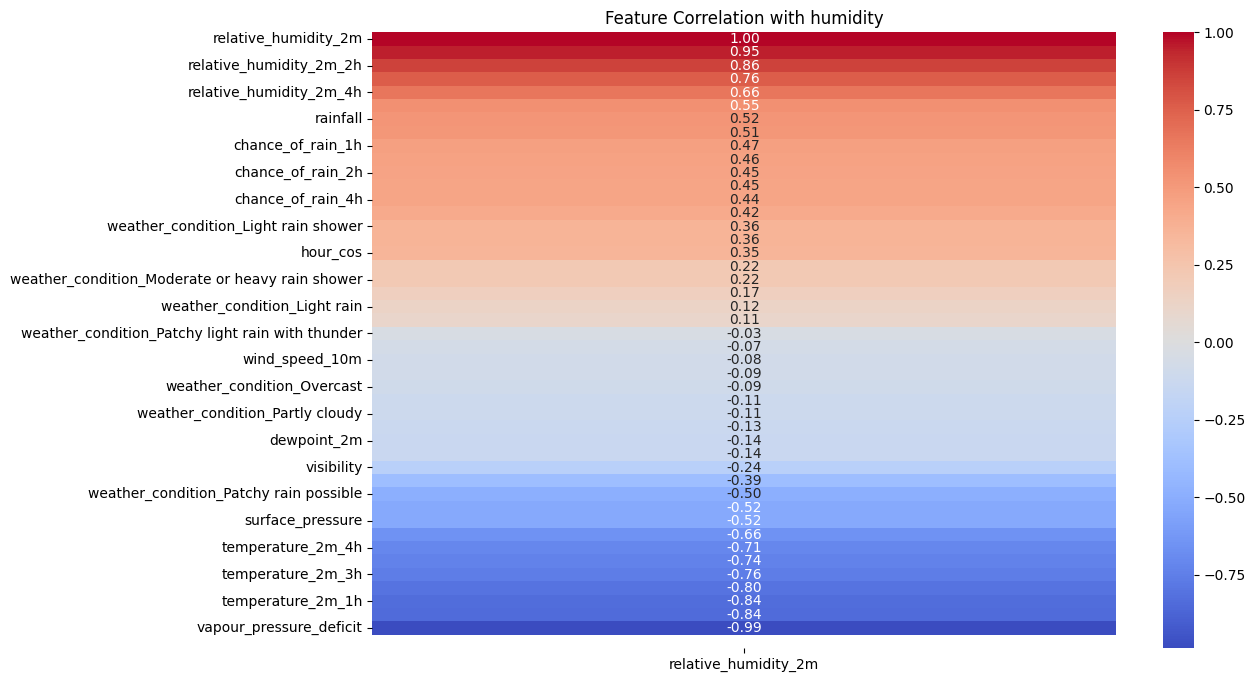

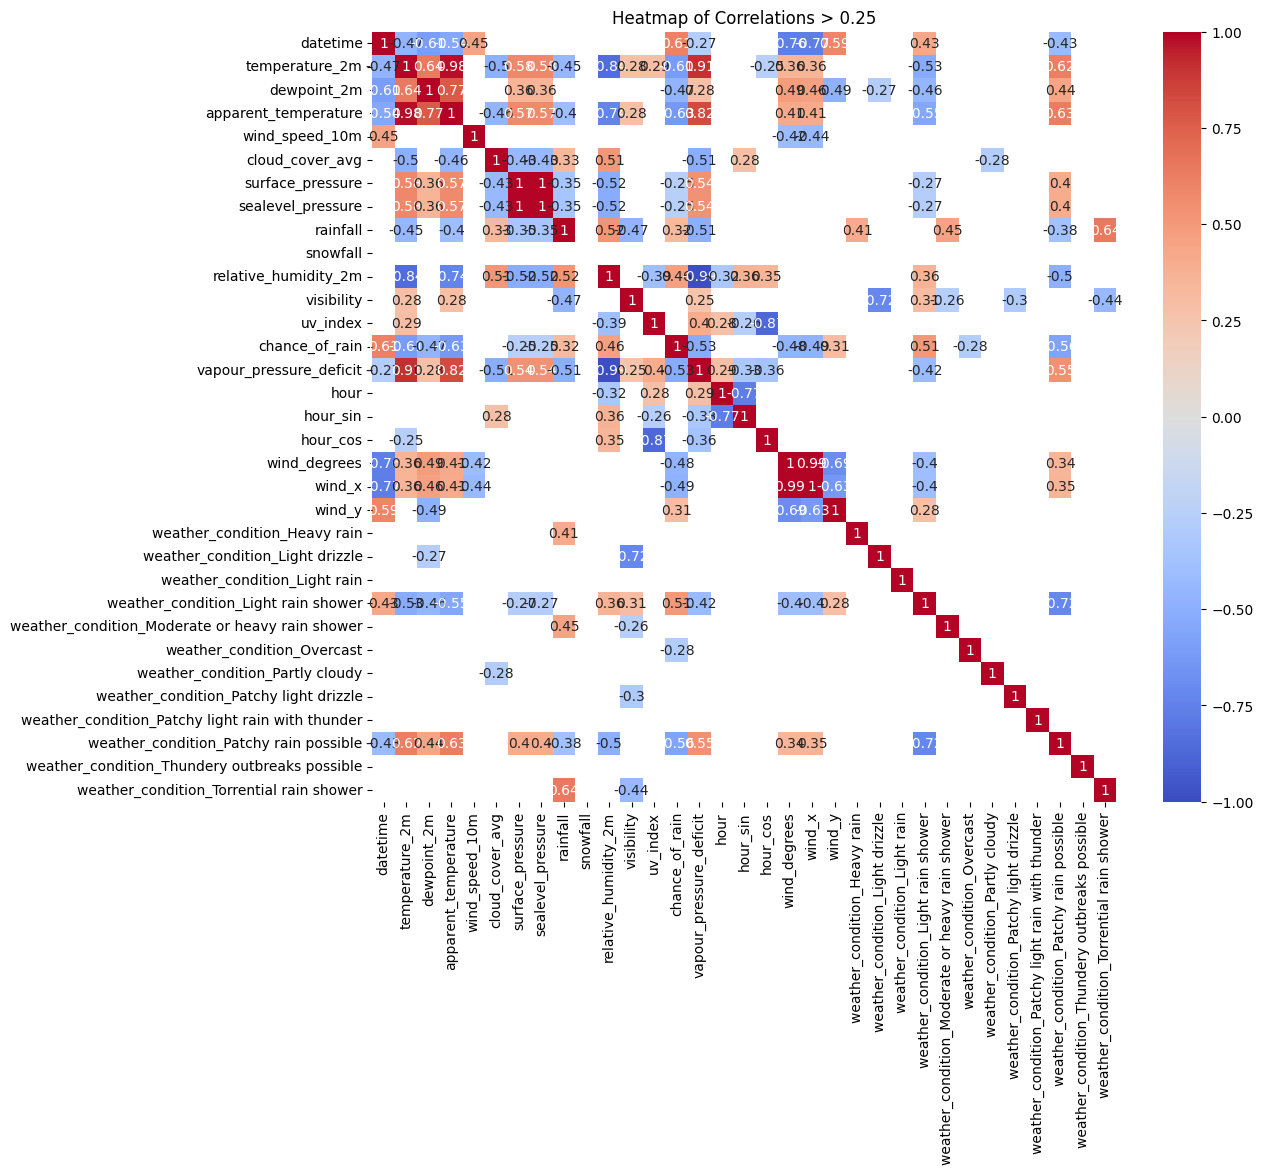

relative_humidity_2m                                1.000000
rainfall                                            0.523984
cloud_cover_avg                                     0.511712
chance_of_rain                                      0.462518
weather_condition_Light rain shower                 0.363220
hour_sin                                            0.362273
hour_cos                                            0.350506
weather_condition_Torrential rain shower            0.220144
weather_condition_Moderate or heavy rain shower     0.219892
datetime                                            0.180100
weather_condition_Heavy rain                        0.165933
weather_condition_Light rain                        0.122913
weather_condition_Light drizzle                     0.107021
weather_condition_Patchy light rain with thunder   -0.033138
weather_condition_Thundery outbreaks possible      -0.069749
wind_speed_10m                                     -0.083692
weather_condition_Patchy

In [85]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filter columns to exclude '1h', '2h', '3h', '4h', '5h'
filtered_columns = [col for col in df.columns if not any(col.endswith(suffix) for suffix in ['1h', '2h', '3h', '4h', '5h'])]

# Calculate correlation matrix for filtered columns
correlation_matrix = df[filtered_columns].corr()



# Plot correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    corr_matrix[['relative_humidity_2m']].sort_values(by='relative_humidity_2m', ascending=False),
    annot=True,
    cmap='coolwarm',
    fmt='.2f'
)
plt.title("Feature Correlation with humidity")
plt.show()





# Filter correlations greater than 0.25
filtered_corr = correlation_matrix[correlation_matrix.abs() > 0.25]

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(filtered_corr, annot=True, cmap="coolwarm", mask=filtered_corr.isnull(), vmin=-1, vmax=1)
plt.title("Heatmap of Correlations > 0.25")
plt.show()



# Compute correlation for the filtered columns
correlation_relative_humidity = df[filtered_columns].corr()['relative_humidity_2m']

# Display correlations sorted by magnitude
print(correlation_relative_humidity.sort_values(ascending=False))


In [86]:
dft.columns

Index(['datetime', 'temperature_2m', 'dewpoint_2m', 'apparent_temperature',
       'wind_speed_10m', 'cloud_cover_avg', 'surface_pressure',
       'sealevel_pressure', 'rainfall', 'snowfall', 'relative_humidity_2m',
       'visibility', 'uv_index', 'chance_of_rain', 'vapour_pressure_deficit',
       'temperature_2m_1h', 'relative_humidity_2m_1h', 'chance_of_rain_1h',
       'temperature_2m_2h', 'relative_humidity_2m_2h', 'chance_of_rain_2h',
       'temperature_2m_3h', 'relative_humidity_2m_3h', 'chance_of_rain_3h',
       'temperature_2m_4h', 'relative_humidity_2m_4h', 'chance_of_rain_4h',
       'temperature_2m_5h', 'relative_humidity_2m_5h', 'chance_of_rain_5h',
       'hour', 'hour_sin', 'hour_cos', 'wind_degrees', 'wind_x', 'wind_y',
       'weather_condition_Heavy rain', 'weather_condition_Light drizzle',
       'weather_condition_Light rain', 'weather_condition_Light rain shower',
       'weather_condition_Moderate or heavy rain shower',
       'weather_condition_Overcast', 'wea

In [87]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor

def iterative_fill_xgboost(df, target_cols, feature_cols):
    """
    Iteratively fill missing values in target_cols using XGBoost.

    Parameters:
        df (pd.DataFrame): DataFrame containing the data.
        target_cols (list): Target columns to predict iteratively (e.g., 'humidity_1h', 'humidity_2h').
        feature_cols (list): Feature columns for training the model.

    Returns:
        pd.DataFrame: DataFrame with missing values in target_cols filled.
    """
    df_filled = df.copy()

    for i, target_col in enumerate(target_cols):
        print(f"\nPredicting and filling missing values for: {target_col}")

        # Train on rows with non-null target_col
        train_df = df_filled[df_filled[target_col].notna()]

        # Predict on rows with null target_col
        predict_df = df_filled[df_filled[target_col].isna()]

        if predict_df.empty:
            print(f"No missing values to fill for {target_col}")
            continue

        # Features for training: all feature_cols + previously predicted target_cols
        current_features = feature_cols + target_cols[:i]

        # Drop rows with NaNs in the training set
        train_df = train_df.dropna(subset=current_features + [target_col])

        if train_df.empty:
            print(f"No sufficient data to train model for {target_col}")
            continue

        X_train = train_df[current_features]
        y_train = train_df[target_col]

        # Drop rows with NaNs in features for the prediction set
        predict_df = predict_df.dropna(subset=current_features)

        if predict_df.empty:
            print(f"No rows with enough features to predict for {target_col}")
            continue

        X_predict = predict_df[current_features]

        # Train the XGBoost model
        model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
        model.fit(X_train, y_train)

        # Predict missing values
        y_pred = model.predict(X_predict)

        # Fill the predicted values back into the DataFrame
        df_filled.loc[X_predict.index, target_col] = y_pred

        print(f"Filled {len(y_pred)} missing values for {target_col}")

    return df_filled

# Example usage:
# Updated feature columns for humidity prediction
feature_cols = [
    "temperature_2m",
    "dewpoint_2m",
    "visibility",
    "uv_index",
    "vapour_pressure_deficit",
    "chance_of_rain",
    "apparent_temperature",
    "rainfall",
    "weather_condition_Moderate or heavy rain shower",
    "weather_condition_Partly cloudy",
    "weather_condition_Patchy rain possible",
    "wind_speed_10m",
    "cloud_cover_avg",
    "surface_pressure",
    "hour_sin",
    "hour_cos"
]

target_cols = [
    "relative_humidity_2m_1h",
    "relative_humidity_2m_2h",
    "relative_humidity_2m_3h",
    "relative_humidity_2m_4h",
    "relative_humidity_2m_5h"
]


# Assuming `df` is your input DataFrame
df_filled = iterative_fill_xgboost(df, target_cols, feature_cols)

# Now, `df_filled` will contain the predicted values for missing humidity levels.



Predicting and filling missing values for: relative_humidity_2m_1h
Filled 1 missing values for relative_humidity_2m_1h

Predicting and filling missing values for: relative_humidity_2m_2h
Filled 2 missing values for relative_humidity_2m_2h

Predicting and filling missing values for: relative_humidity_2m_3h
Filled 3 missing values for relative_humidity_2m_3h

Predicting and filling missing values for: relative_humidity_2m_4h
Filled 4 missing values for relative_humidity_2m_4h

Predicting and filling missing values for: relative_humidity_2m_5h
Filled 5 missing values for relative_humidity_2m_5h


In [88]:
main_prediction_humidity = df_filled.iloc[-1]
print(main_prediction_row_current_feature)

datetime                    2025-06-18 16:00:00
temperature_2m                             29.2
dewpoint_2m                                24.9
apparent_temperature                       34.7
wind_speed_10m                             31.7
wind_direction                               SW
cloud_cover_avg                              51
surface_pressure                         1003.0
sealevel_pressure                        1003.0
rainfall                                   0.11
snowfall                                      0
relative_humidity_2m                         77
visibility                                 10.0
uv_index                                    6.0
chance_of_rain                              100
weather_condition          Patchy rain possible
vapour_pressure_deficit                   0.932
temperature_2m_1h                           NaN
relative_humidity_2m_1h                     NaN
chance_of_rain_1h                           NaN
temperature_2m_2h                       

In [89]:
df_humidity = df_filled

# rainfall probability

In [90]:
df = dft

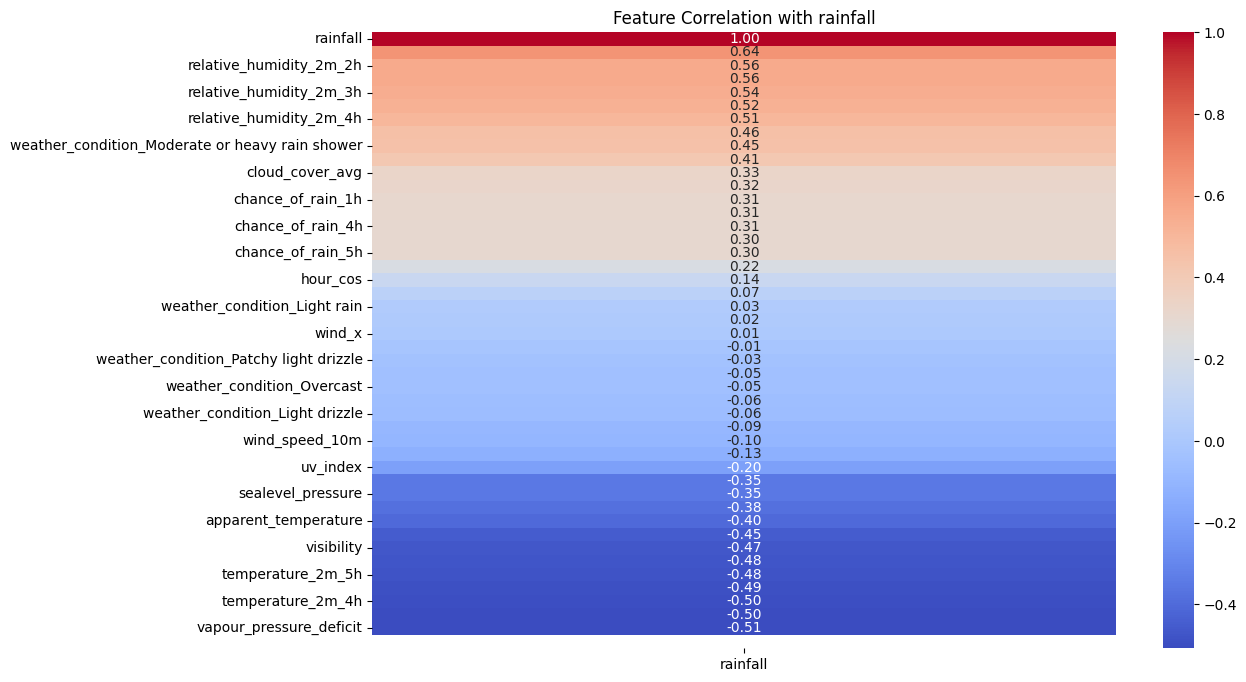

apparent_temperature                               -0.630675
temperature_2m                                     -0.613461
weather_condition_Patchy rain possible             -0.563314
vapour_pressure_deficit                            -0.530260
weather_condition_Light rain shower                 0.505434
wind_x                                             -0.488608
wind_degrees                                       -0.476262
dewpoint_2m                                        -0.472508
relative_humidity_2m                                0.462518
rainfall                                            0.317259
wind_y                                              0.312273
weather_condition_Overcast                         -0.277643
sealevel_pressure                                  -0.250658
surface_pressure                                   -0.250658
cloud_cover_avg                                     0.238774
wind_speed_10m                                      0.214016
visibility              

In [91]:
import pandas as pd

# Assuming your DataFrame is called df

# List of prediction columns to exclude (all columns with _1h, _2h, ... suffixes)
exclude_cols = [col for col in df.columns if any(suffix in col for suffix in ['_1h', '_2h', '_3h', '_4h', '_5h'])]
exclude_cols.append('datetime')  # Exclude datetime column (non-numeric)

# Select columns to check correlation with chance_of_rain
feature_cols = [col for col in df.columns if col not in exclude_cols + ['chance_of_rain']]

# Calculate correlations with chance_of_rain
correlations = df[feature_cols + ['chance_of_rain']].corr()['chance_of_rain'].drop('chance_of_rain')

# Sort correlations by absolute value descending for clarity
correlations_sorted = correlations.abs().sort_values(ascending=False)




# Plot correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    corr_matrix[['rainfall']].sort_values(by='rainfall', ascending=False),
    annot=True,
    cmap='coolwarm',
    fmt='.2f'
)
plt.title("Feature Correlation with rainfall")
plt.show()





# Display sorted correlations with their original values
sorted_correlations_with_values = correlations.loc[correlations_sorted.index]

print(sorted_correlations_with_values)






In [92]:
feature_cols

target_cols = [
    "chance_of_rain_1h",
    "chance_of_rain_2h",
    "chance_of_rain_3h",
    "chance_of_rain_4h",
    "chance_of_rain_5h"
]

In [93]:
# Assuming `df` is your input DataFrame
df_filled = iterative_fill_xgboost(df, target_cols, feature_cols)
df_filled.tail(10)


Predicting and filling missing values for: chance_of_rain_1h
Filled 1 missing values for chance_of_rain_1h

Predicting and filling missing values for: chance_of_rain_2h
Filled 2 missing values for chance_of_rain_2h

Predicting and filling missing values for: chance_of_rain_3h
Filled 3 missing values for chance_of_rain_3h

Predicting and filling missing values for: chance_of_rain_4h
Filled 4 missing values for chance_of_rain_4h

Predicting and filling missing values for: chance_of_rain_5h
Filled 5 missing values for chance_of_rain_5h


,datetime,temperature_2m,dewpoint_2m,apparent_temperature,wind_speed_10m,cloud_cover_avg,surface_pressure,sealevel_pressure,rainfall,snowfall,...,weather_condition_Light rain,weather_condition_Light rain shower,weather_condition_Moderate or heavy rain shower,weather_condition_Overcast,weather_condition_Partly cloudy,weather_condition_Patchy light drizzle,weather_condition_Patchy light rain with thunder,weather_condition_Patchy rain possible,weather_condition_Thundery outbreaks possible,weather_condition_Torrential rain shower
151,2025-06-18 07:00:00,28.4,24.6,33.3,30.2,68,1004.0,1004.0,0.89,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
152,2025-06-18 08:00:00,28.8,24.8,33.9,30.2,59,1004.0,1004.0,0.22,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
153,2025-06-18 09:00:00,29.1,24.8,34.4,30.6,52,1005.0,1005.0,0.14,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
154,2025-06-18 10:00:00,29.3,24.8,34.8,31.0,79,1005.0,1005.0,0.13,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
155,2025-06-18 11:00:00,29.6,24.9,35.2,31.7,85,1005.0,1005.0,0.18,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
156,2025-06-18 12:00:00,29.6,24.9,35.3,32.0,72,1004.0,1004.0,0.62,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
157,2025-06-18 13:00:00,29.7,24.9,35.4,31.7,88,1004.0,1004.0,0.25,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
158,2025-06-18 14:00:00,29.6,24.9,35.3,32.0,86,1003.0,1003.0,0.59,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
159,2025-06-18 15:00:00,29.3,24.9,34.9,32.4,77,1003.0,1003.0,0.27,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
160,2025-06-18 16:00:00,29.2,24.9,34.7,31.7,51,1003.0,1003.0,0.11,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [94]:
# Access and display the filled target columns

df_filled.iloc[-1]


datetime                                            2025-06-18 16:00:00
temperature_2m                                                     29.2
dewpoint_2m                                                        24.9
apparent_temperature                                               34.7
wind_speed_10m                                                     31.7
cloud_cover_avg                                                      51
surface_pressure                                                 1003.0
sealevel_pressure                                                1003.0
rainfall                                                           0.11
snowfall                                                              0
relative_humidity_2m                                                 77
visibility                                                         10.0
uv_index                                                            6.0
chance_of_rain                                                  

In [95]:
main_prediction_rainfall = df_filled.iloc[-1]
print(main_prediction_rainfall)

datetime                                            2025-06-18 16:00:00
temperature_2m                                                     29.2
dewpoint_2m                                                        24.9
apparent_temperature                                               34.7
wind_speed_10m                                                     31.7
cloud_cover_avg                                                      51
surface_pressure                                                 1003.0
sealevel_pressure                                                1003.0
rainfall                                                           0.11
snowfall                                                              0
relative_humidity_2m                                                 77
visibility                                                         10.0
uv_index                                                            6.0
chance_of_rain                                                  

In [96]:
df_rain_prob = df_filled

# combine reults

In [97]:
import pandas as pd

# Assuming dfs is a list of your DataFrames
dfs = [df_temperature, df_humidity, df_rain_prob]  # Replace with your actual DataFrame variables

# Start with the first DataFrame
combined_df = dfs[0]

# Iterate over the remaining DataFrames and combine them
for df in dfs[1:]:
    combined_df = combined_df.combine_first(df)

# Resultant DataFrame with all values filled
print(combined_df)


               datetime  temperature_2m  dewpoint_2m  apparent_temperature  \
0   2025-06-12 00:00:00            29.1         25.7                  35.3   
1   2025-06-12 01:00:00            29.1         25.6                  35.2   
2   2025-06-12 02:00:00            29.0         25.5                  35.0   
3   2025-06-12 03:00:00            29.0         25.4                  34.9   
4   2025-06-12 04:00:00            29.0         25.4                  34.9   
..                  ...             ...          ...                   ...   
156 2025-06-18 12:00:00            29.6         24.9                  35.3   
157 2025-06-18 13:00:00            29.7         24.9                  35.4   
158 2025-06-18 14:00:00            29.6         24.9                  35.3   
159 2025-06-18 15:00:00            29.3         24.9                  34.9   
160 2025-06-18 16:00:00            29.2         24.9                  34.7   

     wind_speed_10m  cloud_cover_avg  surface_pressure  sealeve

In [98]:
combined_df

,datetime,temperature_2m,dewpoint_2m,apparent_temperature,wind_speed_10m,cloud_cover_avg,surface_pressure,sealevel_pressure,rainfall,snowfall,...,weather_condition_Light rain,weather_condition_Light rain shower,weather_condition_Moderate or heavy rain shower,weather_condition_Overcast,weather_condition_Partly cloudy,weather_condition_Patchy light drizzle,weather_condition_Patchy light rain with thunder,weather_condition_Patchy rain possible,weather_condition_Thundery outbreaks possible,weather_condition_Torrential rain shower
0,2025-06-12 00:00:00,29.1,25.7,35.3,21.6,62,1004.0,1004.0,0.06,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2025-06-12 01:00:00,29.1,25.6,35.2,20.2,70,1004.0,1004.0,0.16,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2025-06-12 02:00:00,29.0,25.5,35.0,22.0,86,1004.0,1004.0,0.07,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,2025-06-12 03:00:00,29.0,25.4,34.9,23.0,84,1004.0,1004.0,0.09,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2025-06-12 04:00:00,29.0,25.4,34.9,20.9,76,1004.0,1004.0,0.11,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,2025-06-18 12:00:00,29.6,24.9,35.3,32.0,72,1004.0,1004.0,0.62,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
157,2025-06-18 13:00:00,29.7,24.9,35.4,31.7,88,1004.0,1004.0,0.25,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
158,2025-06-18 14:00:00,29.6,24.9,35.3,32.0,86,1003.0,1003.0,0.59,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
159,2025-06-18 15:00:00,29.3,24.9,34.9,32.4,77,1003.0,1003.0,0.27,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [99]:
combined_df.iloc[-1]

datetime                                            2025-06-18 16:00:00
temperature_2m                                                     29.2
dewpoint_2m                                                        24.9
apparent_temperature                                               34.7
wind_speed_10m                                                     31.7
cloud_cover_avg                                                      51
surface_pressure                                                 1003.0
sealevel_pressure                                                1003.0
rainfall                                                           0.11
snowfall                                                              0
relative_humidity_2m                                                 77
visibility                                                         10.0
uv_index                                                            6.0
chance_of_rain                                                  

In [100]:
exp = combined_df.iloc[-1]

In [101]:
exp.to_csv('export.csv', index=True, encoding='utf-8')

In [102]:

# End the timer at the end of your notebook
end_time = time.time()

# Calculate the total runtime
total_time = end_time - start_time
print(f"Total runtime: {total_time:.2f} seconds")

Total runtime: 11.95 seconds
